In [18]:
import numpy as np
import matplotlib.pyplot as plt
#for generating random numbers
from numpy.random import seed, randint
import math
import pandas as pd
from scipy.stats import skewnorm
from functions import *

In [19]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

### Generate skewed normal random array of lifetime values

In [20]:
seed(10)
# tau_vals = randint(1,1000,100)*1e-9 # convert to s
# create a skewed noraml distribution
tau_vals = skewnorm.rvs(a = 10, loc = 50, scale=100, size=100) *1e-9

In [21]:
np.average(tau_vals)

1.245844614013999e-07

Text(0.5, 0, 'Tau values (ns)')

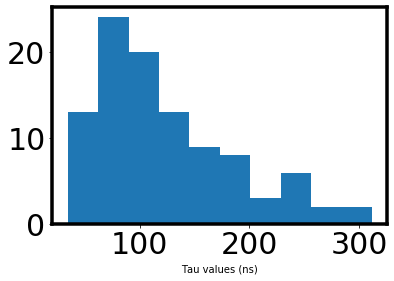

In [22]:
plt.figure()
plt.hist(tau_vals*1e9)
plt.xlabel("Tau values (ns)")

Text(0.5, 0, 'Tau values (ns)')

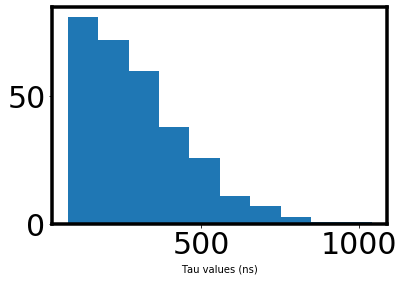

In [23]:
tau_vals_1 = skewnorm.rvs(a = 50, loc = 80, scale=300, size=300) *1e-9
plt.figure()
plt.hist(tau_vals_1*1e9)
plt.xlabel("Tau values (ns)")

Text(0.5, 0, 'Tau values (ns)')

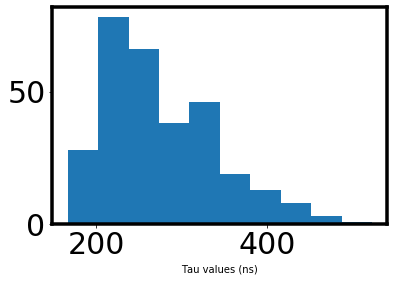

In [51]:
tau_vals_2 = skewnorm.rvs(a = 5, loc = 200, scale=100, size=300) *1e-9
plt.figure()
plt.hist(tau_vals_2*1e9)
plt.xlabel("Tau values (ns)")

### Generate time array

In [25]:
t = np.linspace(0,5000,num=1000)*1e-9 # converted to s

### Generate single exponentials and average them to see the stretched behavior

In [26]:
I_vals = []

for i in range(len(tau_vals)):
    I_vals.append(generate_single_exp(t,tau_vals[i]))
    
I_vals = np.asarray(I_vals)
#Average Trace
I_avg = np.average(I_vals,axis=0)

(1e-08, 1.5)

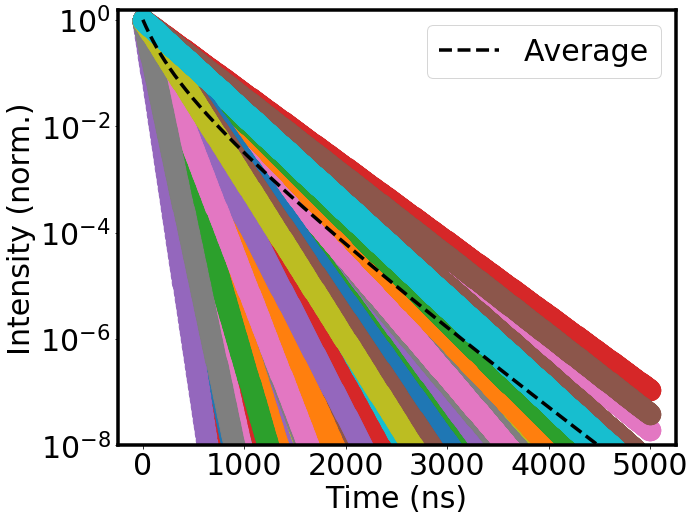

In [27]:
plt.figure(figsize=(10,8))
for i in range(len(tau_vals)):
    plt.plot(t*1e9,I_vals[i],'o')
plt.plot(t*1e9,I_avg,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()
plt.ylim(1e-8,1.5)

### Fit average decay with stretched exponential, double exponential and single exponential 

In [28]:
stretched_exp = stretch_exp_fit(I_avg/np.max(I_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:47: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:47: RuntimeWarning: overflow encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


tau_c (ns) = 96.24933115112798
Beta = 0.7607640097169751
avg. tau (ns) = 113.28078241163921


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  return ((a * np.exp(-((1.0 / tc) * t) ** beta)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:31: RuntimeWarning: invalid value encountered in multiply
  return ((a * np.exp(-((1.0 / tc) * t) ** beta)))


In [29]:
double_exp = double_exp_fit(I_avg/np.max(I_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 90.14530525876006
a1 = 0.7142504188642399
tau2 (ns) = 227.6627666193617
a2 = 0.26462576236445834
avg. tau (ns) = 127.32126657931862


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:71: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:91: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [30]:
single_exp = single_exp_fit(I_avg/np.max(I_avg), t)
print("tau (ns) = "+str(single_exp[0]*1e9))
print("a = "+str(single_exp[1]))
print("avg. tau (ns) = "+str(single_exp[2]*1e9))

tau (ns) = 167.28025659656913
a = 0.7581086881752147
avg. tau (ns) = 167.28025659656913


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:116: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:116: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:132: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [33]:
triple_exp = triple_exp_fit(I_avg/np.max(I_avg), t)
print("tau1 (ns) = "+str(triple_exp[0]*1e9))
print("a1 = "+str(triple_exp[1]))
print("tau2 (ns) = "+str(triple_exp[2]*1e9))
print("a2 = "+str(triple_exp[3]))
print("tau3 (ns) = "+str(triple_exp[4]*1e9))
print("a3 (ns) = "+str(triple_exp[5]))
print("avg. tau (ns) = "+str(triple_exp[6]*1e9))

tau1 (ns) = 67.7058580273944
a1 = 0.44549081233823207
tau2 (ns) = 144.58361253616138
a2 = 0.4278565367366941
tau3 (ns) = 261.73798217848963
a3 (ns) = 0.12442108203239133
avg. tau (ns) = 124.86775537149157


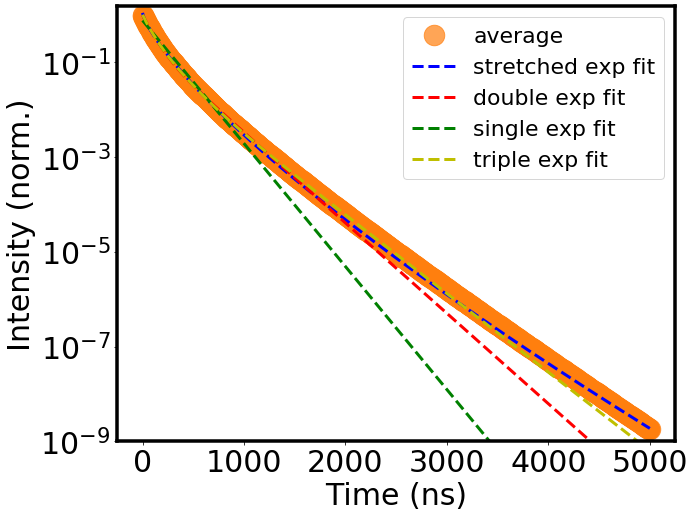

In [53]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, I_avg/np.max(I_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.plot(t*1e9, triple_exp[7], 'y--', lw = 3, label="triple exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.ylim(1e-9,1.5)
plt.legend(fontsize=22)

### Calculate the SRV for each lifetime of the 20 data series

From *Jian, Sarthak, ACS Energy Lett. 2019, 4, 222−227* I took the equation to calculate the SRV.

The average tau I calculated above is the same as the tau effective of the paper. This means that is equal to the sum of the reciprocal of the lifetime in the bulk and in the surface:

$\frac{1}{\tau_{eff}}$ = $\frac{1}{\tau_{b}}$ + $\frac{1}{\tau_{s}}$

The $\tau_{s}$ comes to play in the surface recombination velocity calculation along with *W* (thickness) and *D* (diffusion constant) 

*D* can be measured by the Einstein relationship: 

$D = \mu\cdot K_{b}\cdot T$

Where *$\mu$* is the measured carrier mboility values. 

There are two equations used to calculate SRV which describe two different device cases:

**1) $SRV_{1}$ is approximated to zero**

when the SRV on one contact is much greater than the other one on the other contact

$\tau_{s}$ = $\frac{W}{SRV_{2}}$ + $\frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2$

***equation 1*** : $SRV_{2}$ = $\frac{W}{\tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2}$ 

**1) $SRV_{1}$ = $SRV_{2}$ is approximated to zero**

SRV at the top and the bottom interfaces are the same

$\tau_{s}$ = $\frac{W}{2SRV}$ + $\frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2$

***equation 2*** : $SRV$ = $\frac{W}{2 \left[ \tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2 \right]}$ 

I considered the values of the previous studied films of *$Cs_{17}Br_{15}$* :

- $\mu$ = 35 $cm^2 V^{-1} s^{-1}$
- $D$ = 0.9 $cm^2 s^{-1}$
- $W$ = 400 $nm$ = 0.00004 $cm$

Approaches to calculate $\tau_{b}$ : 

1) One approach to determine $\tau_{b}$  is to measure and extrapolate $\tau_{b}$ from a very thick sample series  where bulk recombination dominates over surface recombination. 

2) The second approach is the Lewis base passivation using TOPO on MAPI which only bound the surface. For this reason, all the remaining recomination that decrease the PLQE is due to the bulk. 
This method allows us to establish a lower limit for the corresponding bulk lifetime ($\tau_{b}$  > 8 μ s) because surface passivation alone can restore well-prepared samples to such levels of performance. 

***equation 1*** : $SRV_{2}$ = $\frac{W}{\tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2}$ 

***equation 2*** : $SRV$ = $\frac{W}{2 \left[ \tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2 \right]}$ 

In [35]:
tau_eff = tau_vals

In [36]:
tau_surf = calculate_surface_lifetime(tau_eff, bulk_lifetime=8000)

In [37]:
# coverting tau_surf to 'cm' units
SRV1_zero, SRV1_SRV2_equal = calculate_srv(tau_surf*1e9, diffusion_coefficient=0.9, thickness=400) #diffusion coeff in cm2/s, thickness in nm

- Calculating the average of the SRV calculated in equation one and two

In [38]:
sim_SRV1_0_ = np.average(SRV1_zero,axis=0)
print(sim_SRV1_0_)

412.2916012224352


In [39]:
sim_SRV1_SRV2_eq_ = np.average(SRV1_SRV2_equal,axis=0)
print(sim_SRV1_SRV2_eq_)

204.73157725958737


#### SRV from average tau of streched exponential fitting:


In [40]:
SRV1_0_str, SRV1_SRV2_eq_str = calculate_srv(stretched_exp[3]*1e9)

In [41]:
print("SRV1 = 0")
print("SRV = "+str(SRV1_0_str))
print("SRV1 = SRV2")
print("SRV = "+str(SRV1_SRV2_eq_str))

SRV1 = 0
SRV = 355.365154958747
SRV1 = SRV2
SRV = 176.8336341412247


#### SRV from average tau of double exponential fitting:

In [42]:
SRV1_0_db, SRV1_SRV2_eq_db = calculate_srv(double_exp[4]*1e9)

In [43]:
print("SRV1 = 0")
print("SRV = "+str(SRV1_0_db))
print("SRV1 = SRV2")
print("SRV = "+str(SRV1_SRV2_eq_db))

SRV1 = 0
SRV = 315.9538685115846
SRV1 = SRV2
SRV = 157.30549525655601


#### SRV from only tau2 of double exponential fitting

In [44]:
SRV1_0_db_t2, SRV1_SRV2_eq_db_t2 = calculate_srv(double_exp[2]*1e9)

In [45]:
print("SRV1 = 0")
print("SRV = "+str(SRV1_0_db_t2))
print("SRV1 = SRV2")
print("SRV = "+str(SRV1_SRV2_eq_db_t2))

SRV1 = 0
SRV = 176.25628618119234
SRV1 = SRV2
SRV = 87.9187967652709


#### SRV from average tau of single exponential fitting:


In [46]:
SRV1_0_si, SRV1_SRV2_eq_si = calculate_srv(single_exp[2]*1e9)

In [47]:
print("SRV1 = 0")
print("SRV = "+str(SRV1_0_si))
print("SRV1 = SRV2")
print("SRV = "+str(SRV1_SRV2_eq_si))

SRV1 = 0
SRV = 240.15405824943358
SRV1 = SRV2
SRV = 119.68871594696127


#### SRV from tau3 of triple exponential fitting:

In [60]:
SRV1_0_t3, SRV1_SRV2_t3 = calculate_srv(triple_exp[4]*1e9)

In [61]:
print("SRV1 = 0")
print("SRV = "+str(SRV1_0_t3))
print("SRV1 = SRV2")
print("SRV = "+str(SRV1_SRV2_t3))

SRV1 = 0
SRV = 153.24644393733223
SRV1 = SRV2
SRV = 76.46491806504146


#### SRV from average tau of triple exponential fitting

In [62]:
SRV1_0_tp, SRV1_SRV2_tp = calculate_srv(triple_exp[6]*1e9)

In [63]:
print("SRV1 = 0")
print("SRV = "+str(SRV1_0_tp))
print("SRV1 = SRV2")
print("SRV = "+str(SRV1_SRV2_tp))

SRV1 = 0
SRV = 322.1980371314316
SRV1 = SRV2
SRV = 160.4008367856925


### Compare each SRV calculated from different fits to true simulated average

Text(0.5, 0, 'SRV (cm/s)')

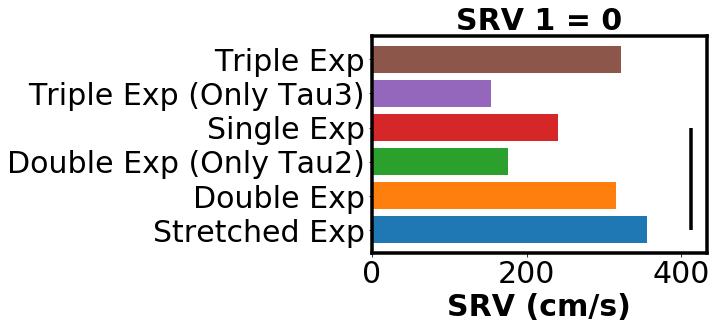

In [64]:
plt.figure()
plt.title("SRV 1 = 0", fontsize=30, fontweight="bold")
plt.barh("Stretched Exp", SRV1_0_str)
plt.barh("Double Exp", SRV1_0_db)
plt.barh("Double Exp (Only Tau2)", SRV1_0_db_t2)
plt.barh("Single Exp", SRV1_0_si)
plt.barh("Triple Exp (Only Tau3)", SRV1_0_t3)
plt.barh("Triple Exp", SRV1_0_tp)
plt.vlines(sim_SRV1_0_, "Stretched Exp", "Single Exp")

plt.xlabel("SRV (cm/s)", fontsize=30, fontweight="bold")

Text(0.5, 0, 'SRV (cm/s)')

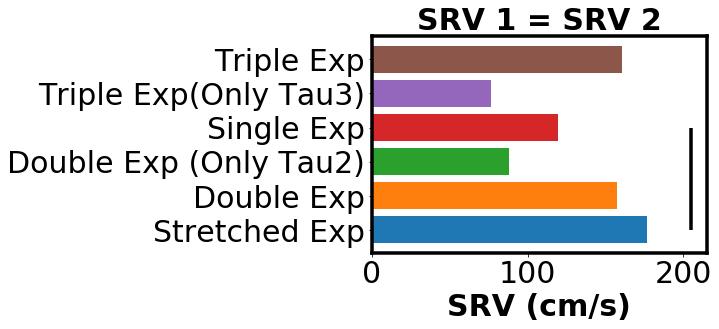

In [65]:
plt.figure()
plt.title("SRV 1 = SRV 2", fontsize=30, fontweight="bold")
plt.barh("Stretched Exp", SRV1_SRV2_eq_str)
plt.barh("Double Exp", SRV1_SRV2_eq_db)
plt.barh("Double Exp (Only Tau2)", SRV1_SRV2_eq_db_t2)
plt.barh("Single Exp", SRV1_SRV2_eq_si)
plt.barh("Triple Exp(Only Tau3)", SRV1_SRV2_t3)
plt.barh("Triple Exp", SRV1_SRV2_tp)
plt.vlines(sim_SRV1_SRV2_eq_, "Stretched Exp", "Single Exp")

plt.xlabel("SRV (cm/s)", fontsize=30, fontweight="bold")

### Conclusion:

From the SRV results we can see that the most accurate approximation is given by the streched exponential fitting